In [9]:
import os
os.chdir('C:\\Users\\arif\\OneDrive - Higher Education Commission\\HI Research\\pyimagesearch')
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from timeseires.utils.to_split import to_split
from timeseires.utils.multivariate_multi_step import multivariate_multi_step
from timeseires.utils.multivariate_single_step import multivariate_single_step
from timeseires.utils.univariate_multi_step import univariate_multi_step
from timeseires.utils.univariate_single_step import univariate_single_step
from timeseires.callbacks.TrainingMonitor import TrainingMonitor
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Bidirectional, GRU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D,TimeDistributed
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,MaxPooling1D,Concatenate,AveragePooling1D, GlobalMaxPooling1D, Input
from tensorflow.keras.models import Sequential,Model
import pandas as pd
import time, pickle
import pydot
import numpy as np
import tensorflow.keras.backend as K
import tensorflow as tf
import tensorflow
from tensorflow.keras.layers import Input, Reshape, Dense, Lambda, RepeatVector
from tensorflow.keras.layers import Layer, Flatten, LeakyReLU, concatenate
from tensorflow.keras.regularizers import l2
import glob

In [1]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')


C:\Users\arif\Anaconda3\envs\irshad2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [4]:
series = read_csv('E:\\DataSets\\ShortTermLF\\toy problem and blog\\shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

In [5]:
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

In [6]:
series.index.to_period('M')

PeriodIndex(['1901-01', '1901-02', '1901-03', '1901-04', '1901-05', '1901-06',
             '1901-07', '1901-08', '1901-09', '1901-10', '1901-11', '1901-12',
             '1902-01', '1902-02', '1902-03', '1902-04', '1902-05', '1902-06',
             '1902-07', '1902-08', '1902-09', '1902-10', '1902-11', '1902-12',
             '1903-01', '1903-02', '1903-03', '1903-04', '1903-05', '1903-06',
             '1903-07', '1903-08', '1903-09', '1903-10', '1903-11', '1903-12'],
            dtype='period[M]', name='Month', freq='M')

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Mon, 15 Apr 2024   AIC                            408.969
Time:                        20:02:09   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

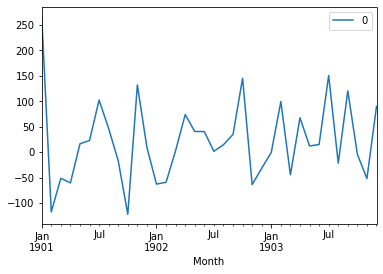

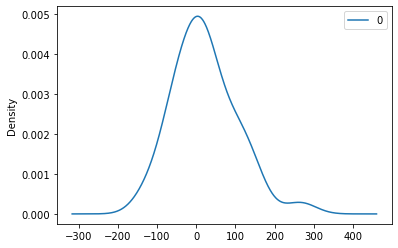

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [3]:

series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [10]:
import os
path_dataset = 'C:\\Users\\arif\\OneDrive - Higher Education Commission\\HI Research\\Datasets\\AEP\\'
path_tr = os.path.join(path_dataset, 'AEP_train.csv')
df_tr = pd.read_csv(path_tr)
#train_set = df_tr.iloc[:,[1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]].values #dataset=np.array(df) dwara use koli sho
train_set = df_tr.iloc[:].values #dataset=np.array(df) dwara use koli sho
path_v = os.path.join(path_dataset, 'AEP_validation.csv')
df_v = pd.read_csv(path_v)
#validation_set = df_v.iloc[:,[1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]].values #dataset=np.array(df) dwara use koli sho
validation_set = df_v.iloc[:].values #dataset=np.array(df) dwara use koli sho
path_te = os.path.join(path_dataset, 'AEP_test.csv')
df_te = pd.read_csv(path_te)
#test_set = df_te.iloc[:,[1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]].values #dataset=np.array(df) dwara use koli sho
test_set = df_te.iloc[:].values #dataset=np.array(df) dwara use koli sho

In [14]:
series = df_tr['aep']

In [18]:
type(series)

pandas.core.series.Series

In [19]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

                               SARIMAX Results                                
Dep. Variable:                    aep   No. Observations:                84907
Model:                 ARIMA(5, 1, 0)   Log Likelihood              209727.001
Date:                Mon, 15 Apr 2024   AIC                        -419442.002
Time:                        20:12:08   BIC                        -419385.906
Sample:                             0   HQIC                       -419424.852
                              - 84907                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0241      0.001    822.897      0.000       1.022       1.027
ar.L2         -0.3536      0.001   -402.732      0.000      -0.355      -0.352
ar.L3          0.0652      0.002     29.218      0.0

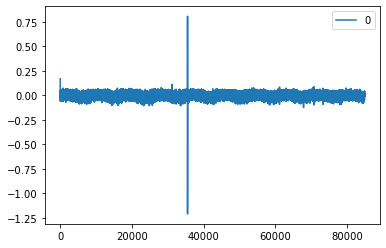

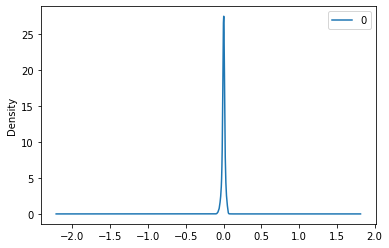

                  0
count  84907.000000
mean       0.000002
std        0.020473
min       -1.208733
25%       -0.009461
50%        0.000853
75%        0.010842
max        0.805227


In [20]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [21]:
series.values

array([0.16910021, 0.14139523, 0.12623237, ..., 0.30550356, 0.30887308,
       0.2945838 ])

In [29]:
train = df_tr['aep']
test = pd.read_csv(path_te)['aep']

In [30]:
test 

0        0.518532
1        0.492949
2        0.485212
3        0.491451
4        0.501934
           ...   
12125    0.499438
12126    0.476351
12127    0.457507
12128    0.392799
12129    0.320729
Name: aep, Length: 12130, dtype: float64

In [32]:
model = ARIMA(train, order=(5,1,0))

In [33]:
model_fit = model.fit()

In [41]:
output = model_fit.forecast()

In [38]:
test

0        0.518532
1        0.492949
2        0.485212
3        0.491451
4        0.501934
           ...   
12125    0.499438
12126    0.476351
12127    0.457507
12128    0.392799
12129    0.320729
Name: aep, Length: 12130, dtype: float64

In [42]:
output

84907    0.277586
dtype: float64

In [43]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

C:\Users\arif\Anaconda3\envs\irshad2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


predicted=0.277586, expected=0.518532
predicted=0.752475, expected=0.492949
predicted=0.386559, expected=0.485212
predicted=0.499006, expected=0.491451
predicted=0.514995, expected=0.501934
predicted=0.467160, expected=0.540559
predicted=0.580989, expected=0.574941
predicted=0.598997, expected=0.552852
predicted=0.520176, expected=0.506864
predicted=0.470173, expected=0.464246
predicted=0.430347, expected=0.432859
predicted=0.405164, expected=0.422189
predicted=0.420901, expected=0.418133
predicted=0.421653, expected=0.427306
predicted=0.443390, expected=0.453388
predicted=0.481700, expected=0.503744
predicted=0.548358, expected=0.592412


KeyboardInterrupt: 